In [100]:
def derivative(func, x, h):
    '''
    Takes x values and a function and approximates the derivative of the function
    Inputs:
        func - Function to find derivative of
        xnext - Next x value to move to
        x - Starting x value
        h - Step size
    Returns:
        Approximated derivative
    '''
    diff = func(x+h)-func(x)
    return(diff/h)

def midpoint(func, h, x0, xn):
    '''
    Uses the rectangular method to integrate the input function
    Inputs:
        func - Function to integrate
        h - Step size
        x0 - Lower bound of integration
        xn - Upper bound of integration
    Returns:
        Approximated numeric integral solution
    '''
    tot = 0
    count = 0
    n = (xn-x0)/h        #find the number of steps to take in intervals of h length between bounds
    xi = x0
    while count < n:
        tot += (func(xi)+func(xi+h))/2
        xi +=h
        count += 1
    return(h*tot)
    
def trapezoidal(func, h, x0, xn):
    '''
    Uses the trapezoidal method to integrate the input function
    Inputs:
        func - Function to integrate
        h - Step size
        x0 - Lower bound of integration
        xn - Upper bound of integration
    Returns:
        Approximated numeric integral solution
    '''
    tot = 0
    count = 0
    n = (xn-x0)/h
    xi = x0
    while count < n:
        tot += (func(xi)+func(xi+h))
        xi +=h
        if xi == (xn-h):
            tot += (2*func(xi)+func(xn))/2
        count += 1
    return((h/2)*tot)
    
def simpson(func, h, a, b):
    '''
    Uses Simpson's method to integrate the input function
    Inputs:
        func - Function to integrate
        h - Step size
        a - Lower bound of integration
        b - Upper bound of integration
    Returns:
        Approximated numeric integral solution
    '''
    i = 0
    n = (b-a)/h
    tot = 0
    while i < n/2:
        tot += (func(a+(2*i*h)) + 4*func(a+(2*i*h+h)) + func(a+(2*i*h+2*h)))
        i += 1
    return((h/3)*tot)

def square(x):
    #x squared function
    return(x**2)

def main():
    print('Running x squared calculus test...')
    print('Derivative: ' + str(derivative(func = square, x = 1, h = 0.0001)))
    print('Rectangular Numeric Integral: ' + str(midpoint(func = square, h = 0.0001, x0 = 1, xn = 4)))
    print('Trapezoidal Numeric Integral: ' + str(trapezoidal(func = square, h = 0.0001, x0 = 1, xn = 4)))
    print('Simpson Numeric Integral: ' + str(simpson(func = square, h = 0.0001, a = 1, b = 4)))
main()

Running x squared calculus test...
Derivative: 2.000099999999172
Rectangular Numeric Integral: 21.000000005026646
Trapezoidal Numeric Integral: 21.000000005026646
Simpson Numeric Integral: 20.999999999999936


Total mass (in solar masses) at 150 km/s: 12247331116.161999
Total mass (in solar masses) at 200 km/s: 21773033095.399113
Total mass (in solar masses) at 250 km/s: 34020364211.561108
Total mass (in solar masses) with concentration factor 10: 12004585734.745466
Total mass (in solar masses) with concentration factor 15: 21773033095.399113
Total mass (in solar masses) with concentration factor 20: 33735358456.148937
Total mass (in solar masses) with concentration factor 25: 47715113622.47417


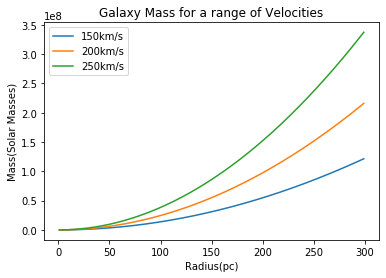

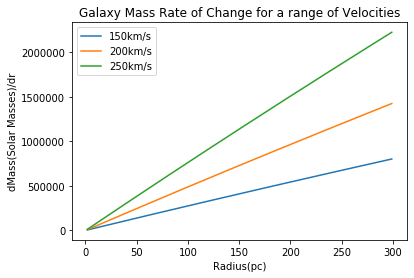

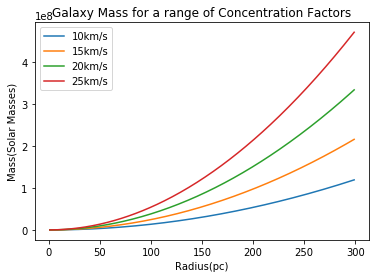

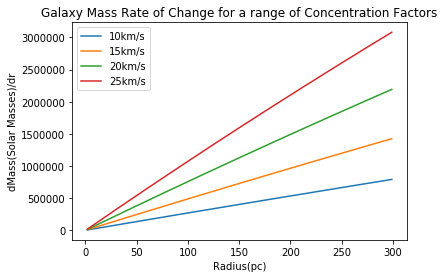

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def Menc(c, r200, v200):
    '''
    Finds the mass enclosed inside of various radii along the disk of a spiral galaxy using the
    NFW approximation for the rotation curve
    Inputs:
        c - Dimensionless concentration factor
        r200 - Radius at which the galaxy density reaches 200 times the critical
               density of the universe
        v200 - Circular velocity of galaxy at r200
    Returns:
        Marray - 
        Mtot -
    '''
    Marray = []
    dMdr = []
    radius = []
    G = 4.3009e-3            #units of pc Msolar^-1 (km/s)^2
    for r in range(1, 300):
        radius.append(r)
        x = r/r200
        numer = np.log(1+c*x) - (c*x/(1+c*x))
        denom = np.log(1+c) - (c/(1+c))
        vc = (((1/x)*(numer/denom))**(1/2))*v200
        menc = r*(vc**2)/G
        Marray.append(menc)
        if r > 1:
            diff = Marray[r-1] - Marray[r-2]
            dMdr.append(diff)     #step size of one so shell mass is the same as rate of change dM/dr
    Mtot = np.sum(Marray)
    return(Marray, Mtot, dMdr, radius)

def main():
    constc = 15        #dimensionless
    constr = 230e3     #units of pc
    constv = 200       #units of km/s
    vels = []
    concen = []
    mass1 = []
    mass2 = []
    totmass1 = []
    totmass2 = []
    dmass1 = []
    dmass2 = []
    for v in range(150, 251, 50):
        masses1 = Menc(c = constc, r200 = constr, v200 = v)
        radius = masses1[3]
        vels.append(v)
        mass1.append(masses1[0])
        totmass1.append(masses1[1])
        dmass1.append(masses1[2])
    labels = []
    plt.figure(1)
    for i in range(0, len(vels)):
        plt.plot(radius, mass1[i])
        newlabel = str(vels[i]) + 'km/s'
        labels.append(newlabel)
        print('Total mass (in solar masses) at ' + str(vels[i]) + ' km/s: ' + str(totmass1[i]))
    plt.title('Galaxy Mass for a range of Velocities')
    plt.legend(labels = labels)
    plt.xlabel('Radius(pc)')
    plt.ylabel('Mass(Solar Masses)')
    plt.figure(2)
    for i in range(0, len(vels)):
        plt.plot(radius[1:], dmass1[i])
    plt.title('Galaxy Mass Rate of Change for a range of Velocities')
    plt.legend(labels = labels)
    plt.xlabel('Radius(pc)')
    plt.ylabel('dMass(Solar Masses)/dr')
    for c in range(10, 26, 5):
        masses2 = Menc(c = c, r200 = constr, v200 = constv)
        concen.append(c)
        mass2.append(masses2[0])
        totmass2.append(masses2[1])
        dmass2.append(masses2[2])
        labels = []
    plt.figure(3)
    for i in range(0, len(concen)):
        plt.plot(radius, mass2[i])
        newlabel = str(concen[i]) + 'km/s'
        labels.append(newlabel)
        print('Total mass (in solar masses) with concentration factor ' + str(concen[i]) + ': ' + str(totmass2[i]))
    plt.title('Galaxy Mass for a range of Concentration Factors')
    plt.legend(labels = labels)
    plt.xlabel('Radius(pc)')
    plt.ylabel('Mass(Solar Masses)')
    plt.figure(4)
    for i in range(0, len(concen)):
        plt.plot(radius[1:], dmass2[i])
    plt.title('Galaxy Mass Rate of Change for a range of Concentration Factors')
    plt.legend(labels = labels)
    plt.xlabel('Radius(pc)')
    plt.ylabel('dMass(Solar Masses)/dr')
main()

In [108]:
import numpy as np

class matrix:
    def __init__(self, data):
        #Creates Matrix object with 2D data array
        self.data = data
        
    def __add__(self, addme):
        '''
        Adds 2 matrix objects together
        Inputs:
            self - First matrix being summed
            addme - Matrix being added to first
        Returns:
            newmat - Matrix sum of inputs
        '''
        newmat = []
        for i in range(0, len(self.data)):
            newmat.append([])
            if i > len(addme.data):
                addme.data.append([])
            for j in range(0, len(self.data[i])):
                if j > len(addme.data[i]):
                    addme.data[i].append(0)
                el = self.data[i][j] + addme.data[i][j]
                newmat[i].append(el)
        return(newmat)
    
    def __mult__(self, multer):
        '''
        Multiplies 2 matrix objects together
        Inputs:
            self - The first matrix being multiplied, matrices must be in order
            addme - The second matrix being multiplied
        Returns:
            newmat - Matrix product of inputs
        '''
        newmat = []
        primary = self.data
        secondary = multer.data
        if len(primary[0]) != len(secondary):
            raise ValueError('Cannot multiply these matrices')
        for k in range(0, len(primary)):
            newmat.append([])
            for i in range(0, len(primary)):
                el = 0
                for j in range(0, len(primary[i])):
                    el += primary[k][j]*secondary[j][i]
                newmat[k].append(el)
        return(newmat)
    
    def transpose(self):
        '''
        Takes the transpose of a matrix
        Inputs:
            self - The matrix to find the transpose of
        Returns:
            newmat - Transposed matrix
        '''
        newmat = []
        for i in range(0, len(self.data[0])):
            newmat.append([])
        for i in range(0, len(self.data)):
            for j in range(0, len(self.data[i])):
                newmat[j].append(self.data[i][j])
        return(newmat)
    
    def invert(self):
        return
    
    def trace(self):
        '''
        Takes the trace of a matrix
        Inputs:
            self - The matrix to find the trace of
        Returns:
            tot - Trace of matrix
        '''
        if len(self.data) != len(self.data[0]):
            raise ValueError('Must be square matrix')
        tot = 0
        for i in range(0, len(self.data)):
            tot += self.data[i][i]
        return(tot)
    
    def determ(self):
        if len(self.data) != len(self.data[0]):
            raise ValueError('Must be square matrix')
        if len(self.data) == 2:
            return(self.determ2x2())
        else:
            tot = 0
            for i in range(0, len(self.data[0])):
                newmat = []
                for j in range(1, len(self.data)):
                    newrow = self.data[0:i] + self.data[i+1:]
                    newmat.append(newrow)
                    newmatrix = matrix(newmat)
                if len(newmat) == 2:
                    tot += self.data[i]*newmatrix.determ2x2()
                else:
                    tot += self.data[i]*newmatrix.determ()
            return(tot)
                    
    def determ2x2(self):
        #finds 2x2 matrix determinant
        return((self.data[0][0]*self.data[1][1])-(self.data[0][1]*self.data[1][0]))
    
    def LUdecomp(self, other):
        return
    
def main():
    m1 = matrix([[7,4], [9,6]])
    m2 = matrix([[8,0], [4,1]])
    m3 = matrix([[5,2,7], [3,1,8]])
    m4 = matrix([[2,6], [4,0], [1,3]])
    m5 = matrix([[1,2,3], [5,1,4], [0,2,5]])
    print('Adding Matrices: ' + str(m1.data) + ' & ' + str(m2.data))
    added = m1.__add__(addme = m2)
    print('Sum: ' + str(added))
    print('Multiplying Matrices: ' + str(m3.data) + ' & ' + str(m4.data))
    multiplied = m3.__mult__(multer = m4)
    print('Product: ' + str(multiplied))
    print('Transposing Matrix : ' + str(m4.data))
    transpose = m4.transpose()
    print('Transpose: ' + str(transpose))
    print('Finding Trace of: ' + str(m5.data))
    tra = m5.trace()
    print('Trace = ' + str(tra))
    print('Finding Determinant of: ' + str(m5.data))
    det = m5.determ()
    print('Determinant = ' + str(det))
main()

Adding Matrices: [[7, 4], [9, 6]] & [[8, 0], [4, 1]]
Sum: [[15, 4], [13, 7]]
Multiplying Matrices: [[5, 2, 7], [3, 1, 8]] & [[2, 6], [4, 0], [1, 3]]
Product: [[25, 51], [18, 42]]
Transposing Matrix : [[2, 6], [4, 0], [1, 3]]
Transpose: [[2, 4, 1], [6, 0, 3]]
Finding Trace of: [[1, 2, 3], [5, 1, 4], [0, 2, 5]]
Trace = 7
Finding Determinant of: [[1, 2, 3], [5, 1, 4], [0, 2, 5]]


TypeError: can't multiply sequence by non-int of type 'list'